# Import Dataset

In [22]:
library(dplyr)
library(ggplot2)
library(plyr)
library(zoo)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(leaps)
library(car)
library(corrplot)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)

# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
#head(minn)
minn = data.frame(minn)
head(minn)

summary(minn)

YEAR,STATEFIP,FAMSIZE,SEX,AGE,MARRNO,RACE,RACED,YRSUSA1,EDUC,EDUCD,CLASSWKR,CLASSWKRD,UHRSWORK,INCWAGE,POVERTY,OCCSCORE,DIFFSENS
2018,27,3,1,37,1,1,100,0,10,101,2,22,40,39815,501,42,1
2018,27,3,2,37,1,1,100,0,10,101,2,22,50,106173,501,42,1
2018,27,2,2,25,0,1,100,0,7,71,2,22,36,16988,105,16,1
2018,27,5,2,43,1,1,100,0,8,81,2,22,32,45654,363,25,1
2018,27,5,1,42,1,1,100,0,8,81,2,22,50,63704,363,30,1
2018,27,5,2,18,0,1,100,0,6,61,0,0,0,0,363,0,1


      YEAR         STATEFIP     FAMSIZE            SEX             AGE       
 Min.   :2018   Min.   :27   Min.   : 1.000   Min.   :1.000   Min.   :18.00  
 1st Qu.:2018   1st Qu.:27   1st Qu.: 2.000   1st Qu.:1.000   1st Qu.:35.00  
 Median :2018   Median :27   Median : 2.000   Median :2.000   Median :52.00  
 Mean   :2018   Mean   :27   Mean   : 2.566   Mean   :1.502   Mean   :50.77  
 3rd Qu.:2018   3rd Qu.:27   3rd Qu.: 3.000   3rd Qu.:2.000   3rd Qu.:64.00  
 Max.   :2018   Max.   :27   Max.   :17.000   Max.   :2.000   Max.   :95.00  
     MARRNO            RACE           RACED          YRSUSA1      
 Min.   :0.0000   Min.   :1.000   Min.   :100.0   Min.   : 0.000  
 1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0   1st Qu.: 0.000  
 Median :1.0000   Median :1.000   Median :100.0   Median : 0.000  
 Mean   :0.9413   Mean   :1.306   Mean   :131.8   Mean   : 1.261  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0   3rd Qu.: 0.000  
 Max.   :3.0000   Max.   :9.000   Max.   :990.0   Ma

# Cleaning Dataset

In [23]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
minn$MARST = minn1$MARST
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
minn$RACE[minn$RACE == 1] = "White"
minn$RACE[minn$RACE == 2] = "Black/African American"
minn$RACE[minn$RACE == 3] = "American Indian or Alaska Native"
minn$RACE[minn$RACE == 4] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 5] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 6] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 7] = "Other Race"
minn$RACE[minn$RACE == 8] = "Other Race"
minn$RACE[minn$RACE == 9] = "Other Race"

# Grouping Education Levels
minn$EDUC[minn$EDUC == 0] = "High School or Less"
minn$EDUC[minn$EDUC == 1] = "High School or Less"
minn$EDUC[minn$EDUC == 2] = "High School or Less"
minn$EDUC[minn$EDUC == 3] = "High School or Less"
minn$EDUC[minn$EDUC == 4] = "High School or Less"
minn$EDUC[minn$EDUC == 5] = "High School or Less"
minn$EDUC[minn$EDUC == 6] = "High School or Less"
minn$EDUC[minn$EDUC == 7] = "College or More"
minn$EDUC[minn$EDUC == 8] = "College or More"
minn$EDUC[minn$EDUC == 9] = "College or More"
minn$EDUC[minn$EDUC == 10] = "College or More"
minn$EDUC[minn$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used in R Studio changed the NA values to 0
minn$YRSUSA1[minn$YRSUSA1 == 0] = NA

# FAMSIZE, AGE, MARRNO, YRSUSA1, UHRSWORK, INCWAGE, OCCSCORE are continuous

In [27]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
head(mn)

FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS
3,Male,37,1,White,NA,College or More,Works for wages,40,39815,42,No vision or hearing difficulty
3,Female,37,1,White,NA,College or More,Works for wages,50,106173,42,No vision or hearing difficulty
2,Female,25,0,White,NA,College or More,Works for wages,36,16988,16,No vision or hearing difficulty
5,Female,43,1,White,NA,College or More,Works for wages,32,45654,25,No vision or hearing difficulty
5,Male,42,1,White,NA,College or More,Works for wages,50,63704,30,No vision or hearing difficulty
5,Female,18,0,White,NA,High School or Less,N/A,0,0,0,No vision or hearing difficulty


# Exploratory Analysis

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 203025 rows containing non-finite values (stat_count).”

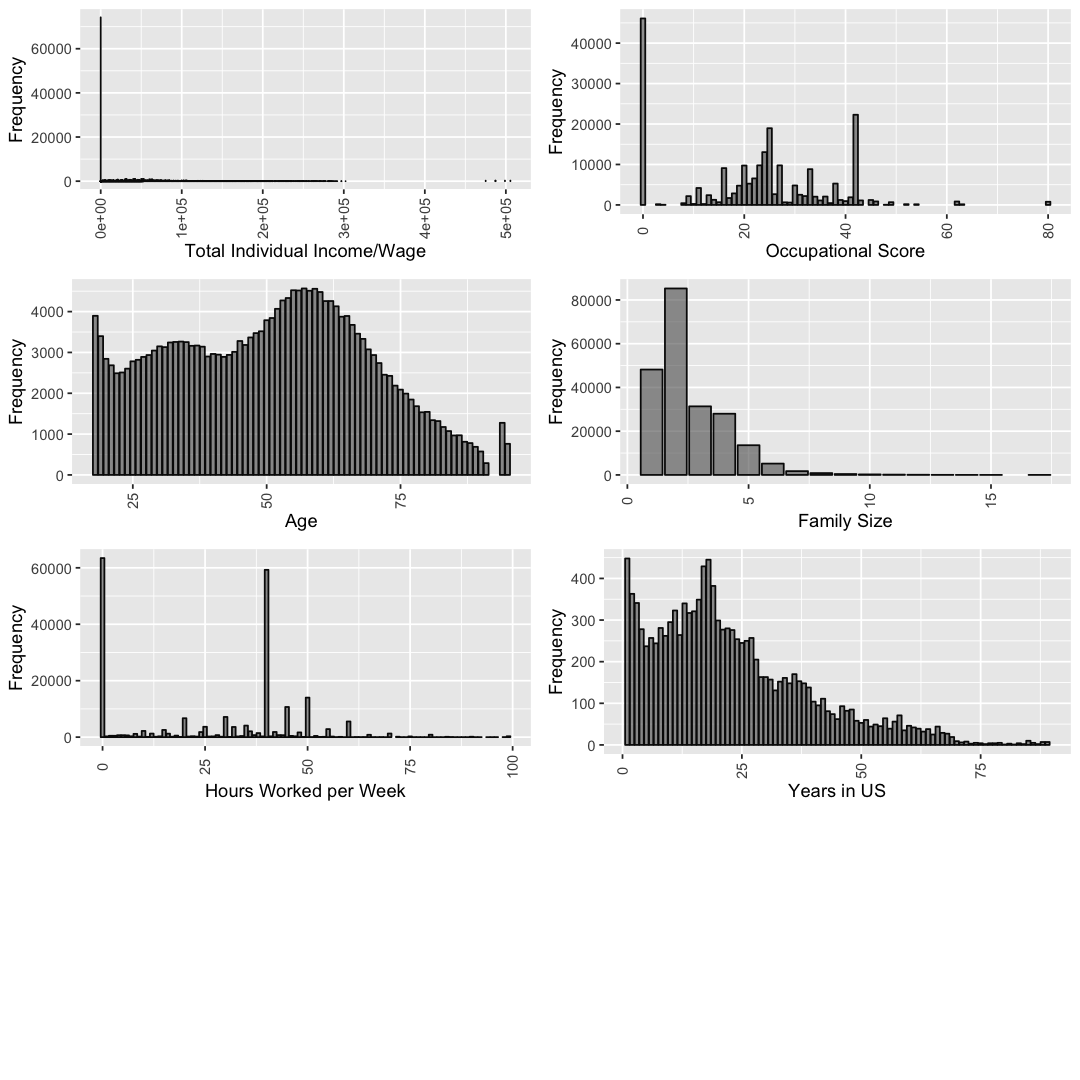

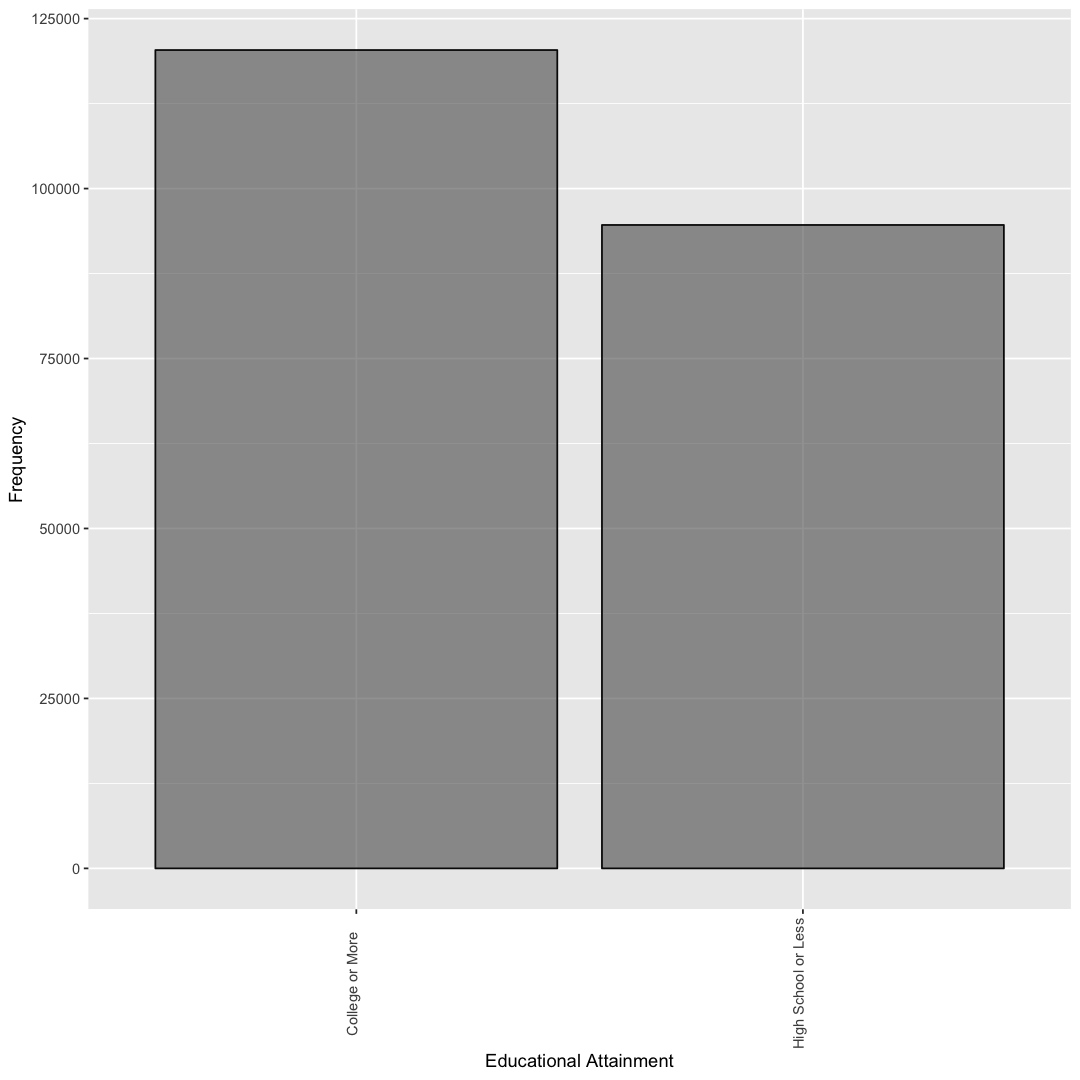

In [25]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.1)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(mn, aes(x = mn$YRSUSA1)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")
grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, 
             hours_hist, years_hist, nrow=4)

edu_hist

Warning message:
“Removed 203025 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 203025 rows containing missing values (geom_point).”

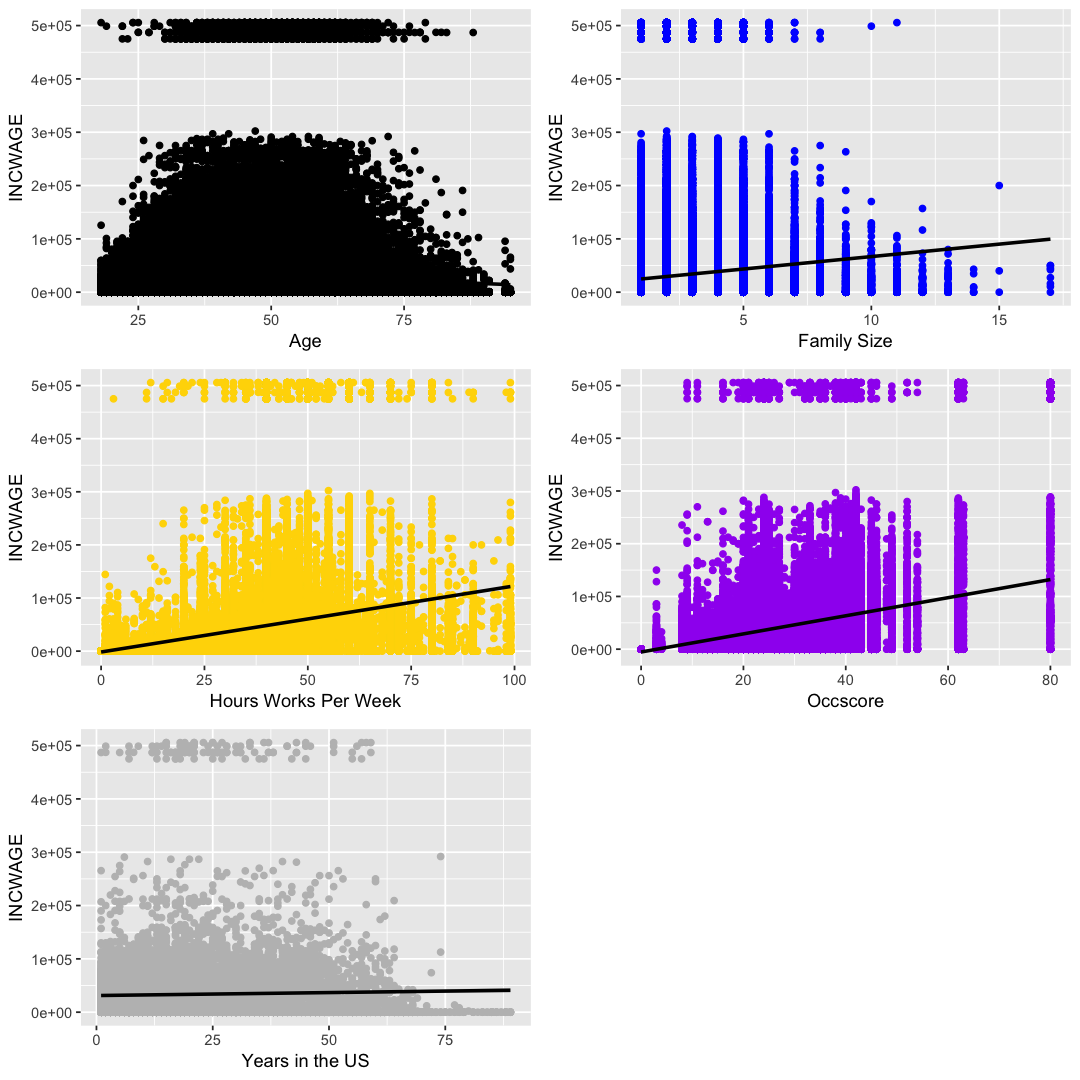

In [26]:
plot1 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$AGE)) + 
  geom_point(color = 'black') + xlab('Age') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot2 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$FAMSIZE)) + 
  geom_point(color = 'blue') + xlab('Family Size') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot3 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$UHRSWORK)) + 
  geom_point(color = 'gold') + xlab('Hours Works Per Week') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot4 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$OCCSCORE)) + 
  geom_point(color = 'purple') + xlab('Occscore') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot5 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$YRSUSA1)) + 
  geom_point(color = 'grey') + xlab('Years in the US') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

grid.arrange(plot1, plot2, plot3, plot4, plot5, nrow = 3, ncol = 2)

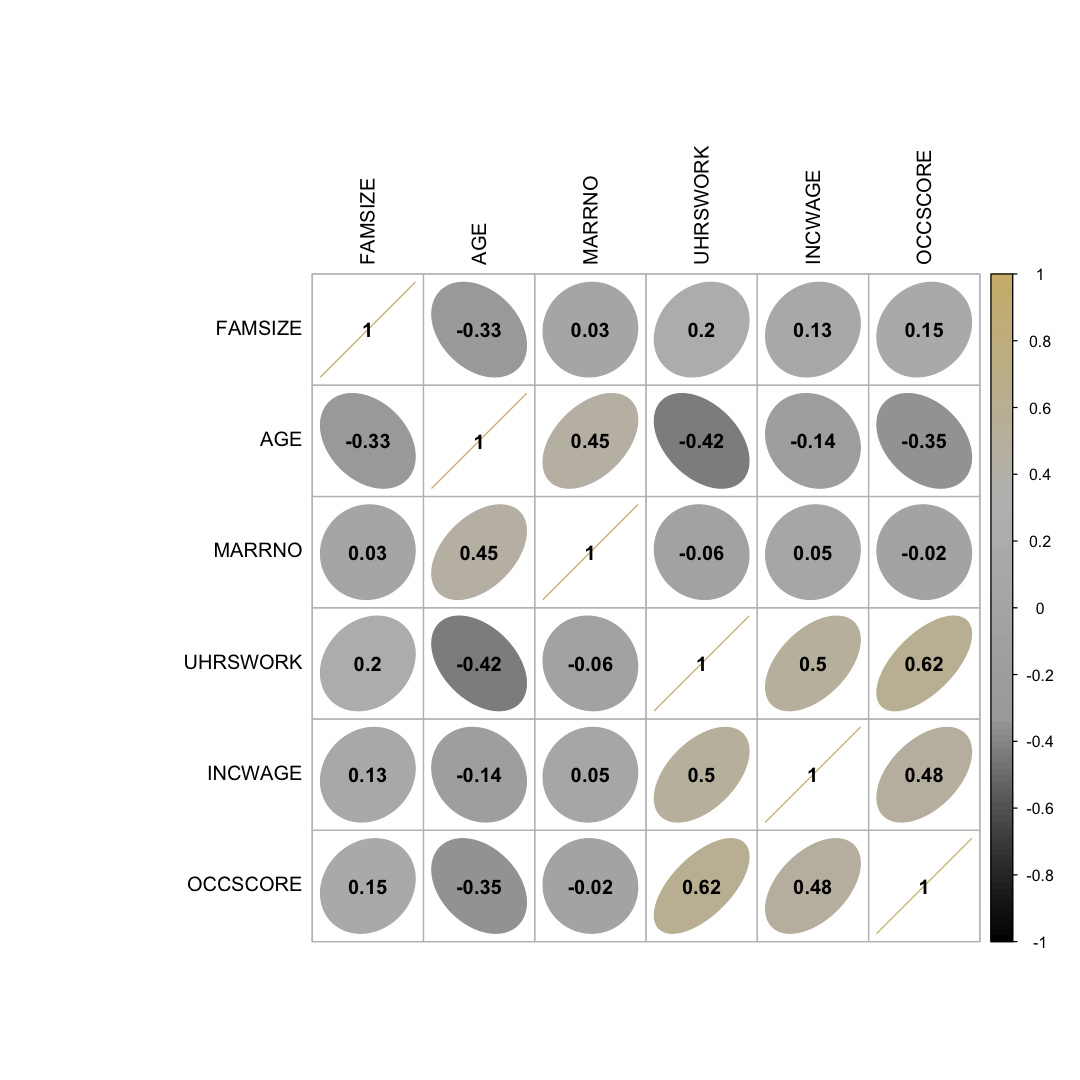

In [35]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(mn[,c(1, 3, 4, 9, 10, 11)]), 
         method = "ellipse", col = col4(100), addCoef.col = "black", tl.col = "black")

# AIC and BIC Graphs

(Intercept),FAMSIZE,SEXMale,AGE,MARRNO,RACEAsian American or Pacific Islander,RACEBlack/African American,RACEOther Race,RACEWhite,YRSUSA1,EDUCHigh School or Less,CLASSWKRSelf-employed,CLASSWKRWorks for wages,UHRSWORK,OCCSCORE,DIFFSENSNo vision or hearing difficulty
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


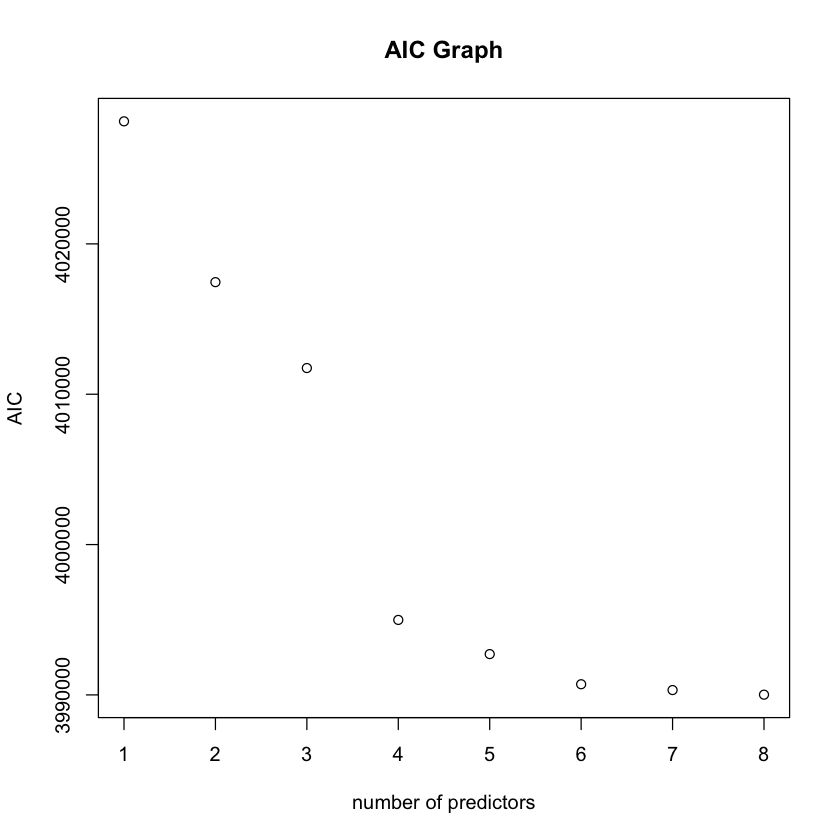

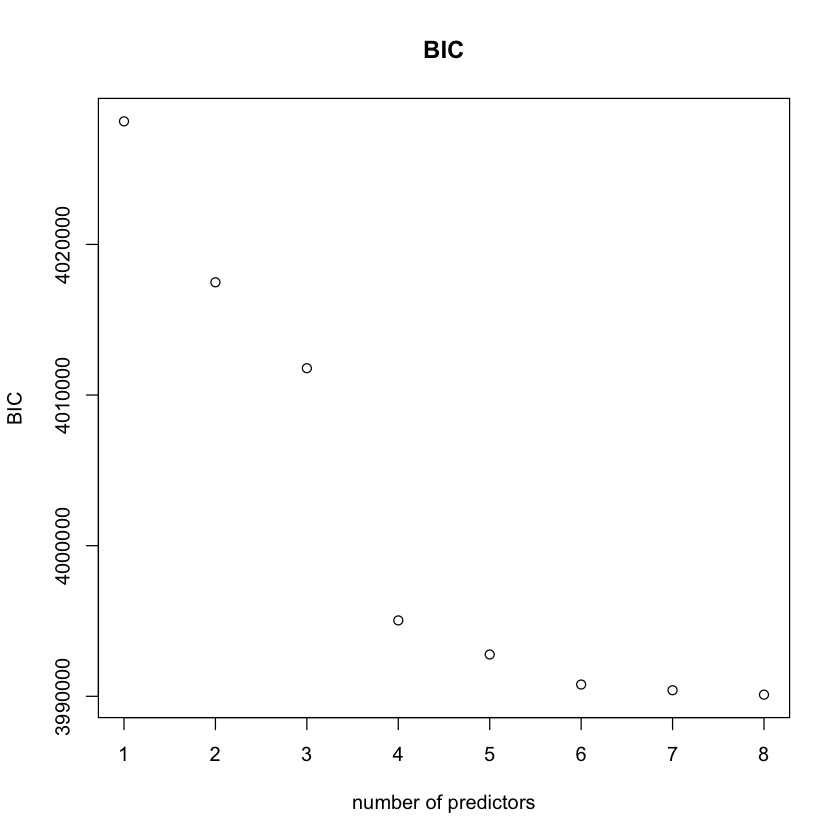

In [8]:
# corr = cor(model.matrix(lmod_co)[,-1])

n = dim(mn)[1]; 
regmn = regsubsets(INCWAGE ~ ., data = mn)
rs = summary(regmn)
rs$which

AIC = 2*(2:9) + n*log(rs$rss/n)
plot(AIC ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "AIC Graph")

# Best predictors in terms of AIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

BIC = log(n)*(2:9) + n*log(rs$rss/n) 
plot(BIC ~ I(1:8), xlab = "number of predictors", ylab = "BIC", main = "BIC")

# Best predictors in terms of BIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
215014,3.664330e+14,NA,NA,NA,NA
215013,3.654702e+14,1,962810687844,566.4396,4.854117e-125


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
215013,3.654702e+14,NA,NA,NA,NA
215008,3.645137e+14,5,956495402227,112.8375,1.589352e-119


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


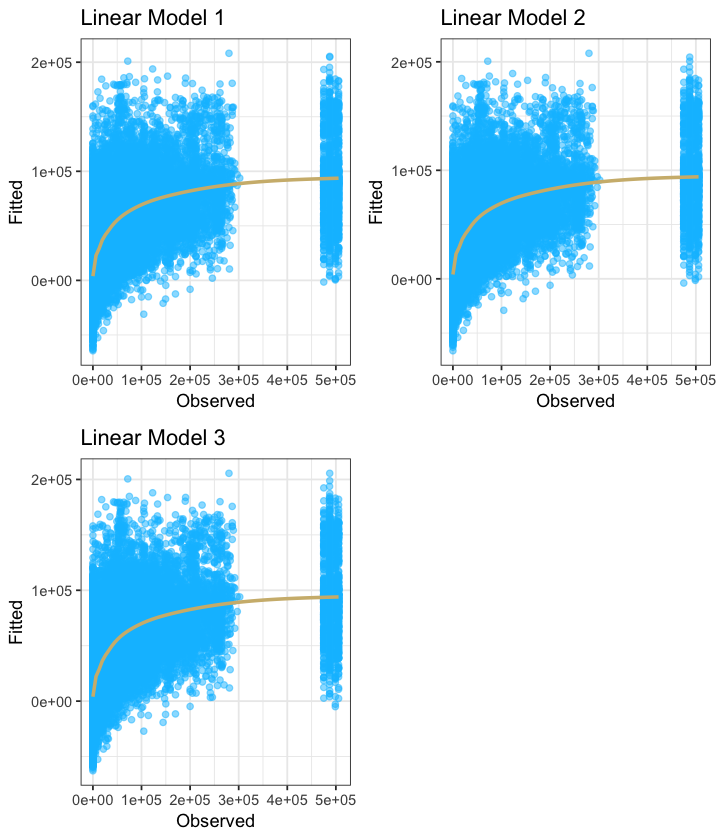

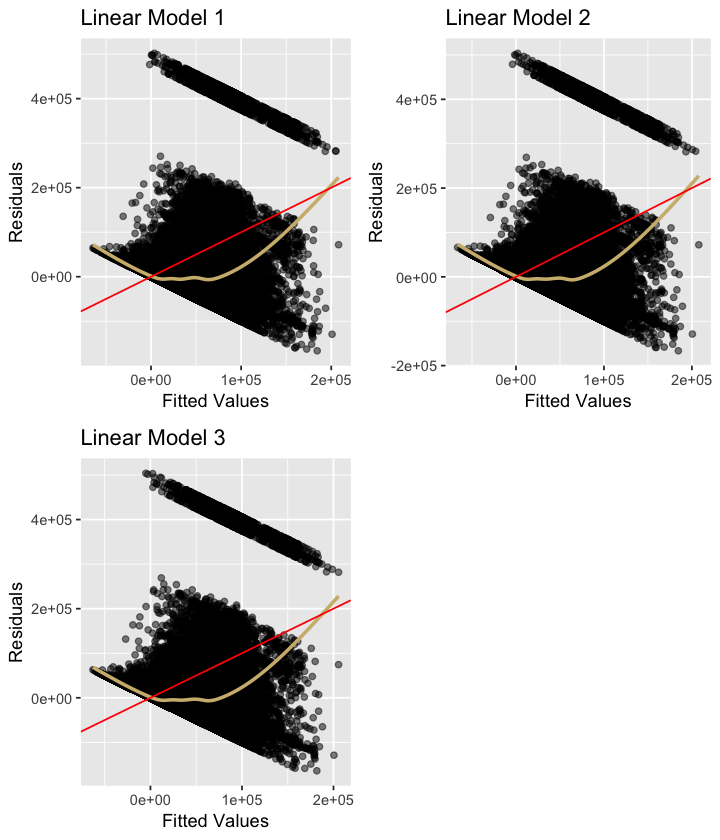

In [9]:
lm_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , mn)
lm_2 = lm(INCWAGE ~ SEX+ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, mn)
lm_3 = lm(INCWAGE ~ SEX+ AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, mn)

anova(lm_1, lm_2)
anova(lm_2, lm_3)

lm_diag1 = data.frame(yhat = fitted(lm_1), r = resid(lm_1), y = mn$INCWAGE)
lm_diag2 = data.frame(yhat = fitted(lm_2), r = resid(lm_2), y = mn$INCWAGE)
lm_diag3 = data.frame(yhat = fitted(lm_3), r = resid(lm_3), y = mn$INCWAGE)

options(repr.plot.width = 6, repr.plot.width = 6)
lm1 = ggplot(lm_diag1, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 1") +
    theme_bw()

lm2 = ggplot(lm_diag2, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 2") +
    theme_bw()

lm3 = ggplot(lm_diag3, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 3") +
    theme_bw()


res1 = ggplot(lm_diag1, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") + 
    ggtitle("Linear Model 1") +
    ylab("Residuals")
res2 = ggplot(lm_diag2, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") + 
    ggtitle("Linear Model 2") +
    ylab("Residuals")
res3 = ggplot(lm_diag3, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") +
    ggtitle("Linear Model 3") +
    ylab("Residuals")

grid.arrange(lm1, lm2, lm3, nrow=2)
grid.arrange(res1, res2, res3, nrow = 2)


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-163805  -15427   -2593    7461  503879 

Coefficients:
                                          Estimate Std. Error  t value Pr(>|t|)
(Intercept)                             -15415.409    992.135  -15.538  < 2e-16
SEXMale                                   4732.775    184.640   25.632  < 2e-16
AGE                                        152.891      6.562   23.300  < 2e-16
MARRNO                                    3453.026    150.937   22.877  < 2e-16
EDUCHigh School or Less                  -9277.663    188.894  -49.116  < 2e-16
CLASSWKRSelf-employed                   -60708.255    476.297 -127.459  < 2e-16
CLASSWKRWorks for wages                 -36376.473    402.739  -90.323  < 2e-16
UHRSWORK                                  1105.168      6.075  181.912  < 2e-16
OCCSCORE                                  1552.

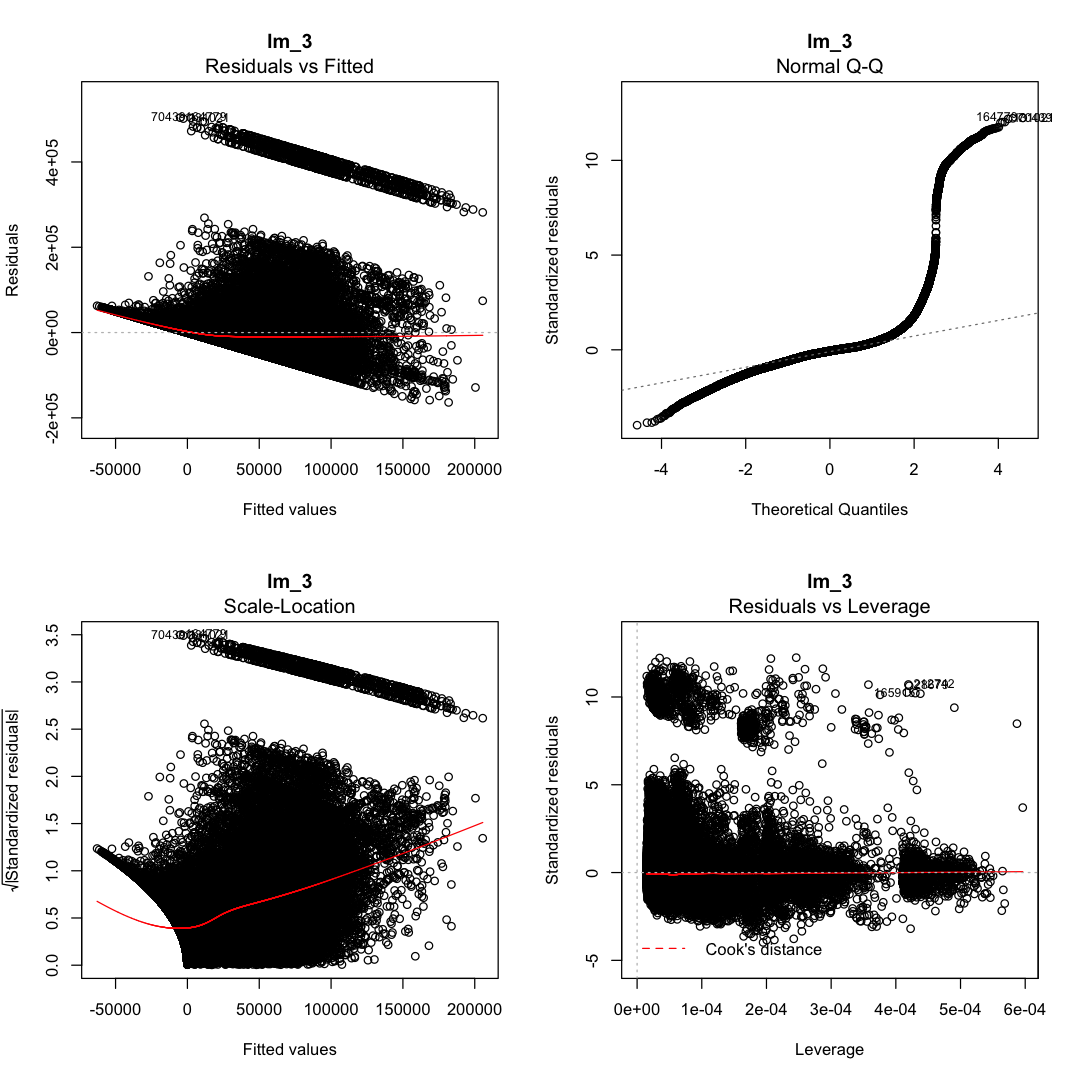

In [36]:
summary(lm_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_3, main = "lm_3")

# Transformations

RACE,CLASSWKR,DIFFSENS,SEX,inc1,sqrt_fam,sqrt_age,sqrt_mar,sqrt_hrs,sqrt_occ,...,log_age,log_mar,log_hrs,log_occ,inc3,inv_fam,inv_age,inv_mar,inv_hrs,inv_occ
White,Works for wages,No vision or hearing difficulty,Male,199.5370,1.732051,6.082763,1,6.324555,6.480741,...,3.610918,0,3.688879,3.737670,2.511616e-05,0.3333333,0.02702703,1,40,42
White,Works for wages,No vision or hearing difficulty,Female,325.8420,1.732051,6.082763,1,7.071068,6.480741,...,3.610918,0,3.912023,3.737670,9.418590e-06,0.3333333,0.02702703,1,50,42
White,Works for wages,No vision or hearing difficulty,Female,130.3380,1.414214,5.000000,0,6.000000,4.000000,...,3.218876,0,3.583519,2.772589,5.886508e-05,0.5000000,0.04000000,0,36,16
White,Works for wages,No vision or hearing difficulty,Female,213.6680,2.236068,6.557439,1,5.656854,5.000000,...,3.761200,0,3.465736,3.218876,2.190389e-05,0.2000000,0.02325581,1,32,25
White,Works for wages,No vision or hearing difficulty,Male,252.3965,2.236068,6.480741,1,7.071068,5.477226,...,3.737670,0,3.912023,3.401197,1.569760e-05,0.2000000,0.02380952,1,50,30
White,N/A,No vision or hearing difficulty,Female,0.0000,2.236068,4.242641,0,0.000000,0.000000,...,2.890372,0,0.000000,0.000000,0.000000e+00,0.2000000,0.05555556,0,0,0


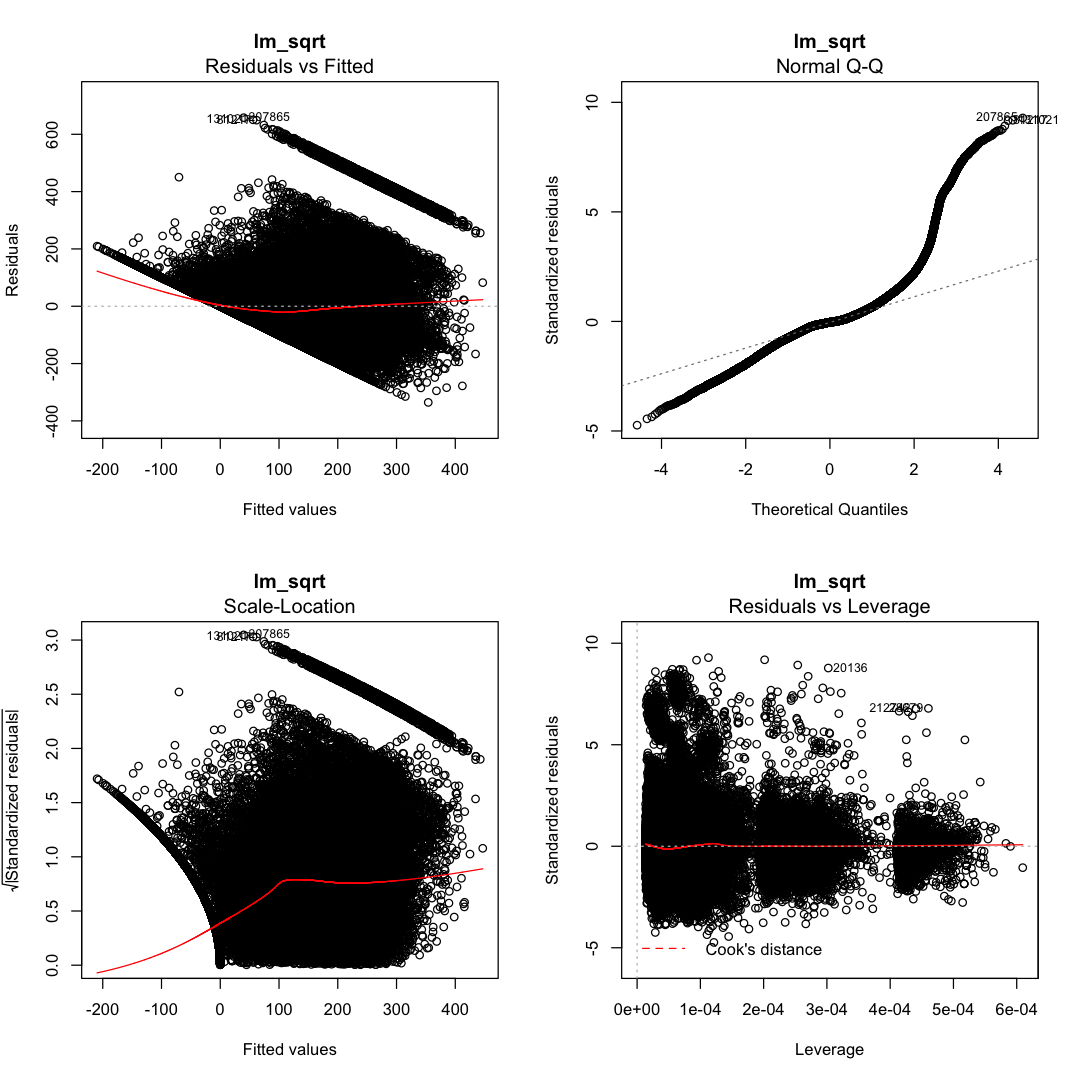

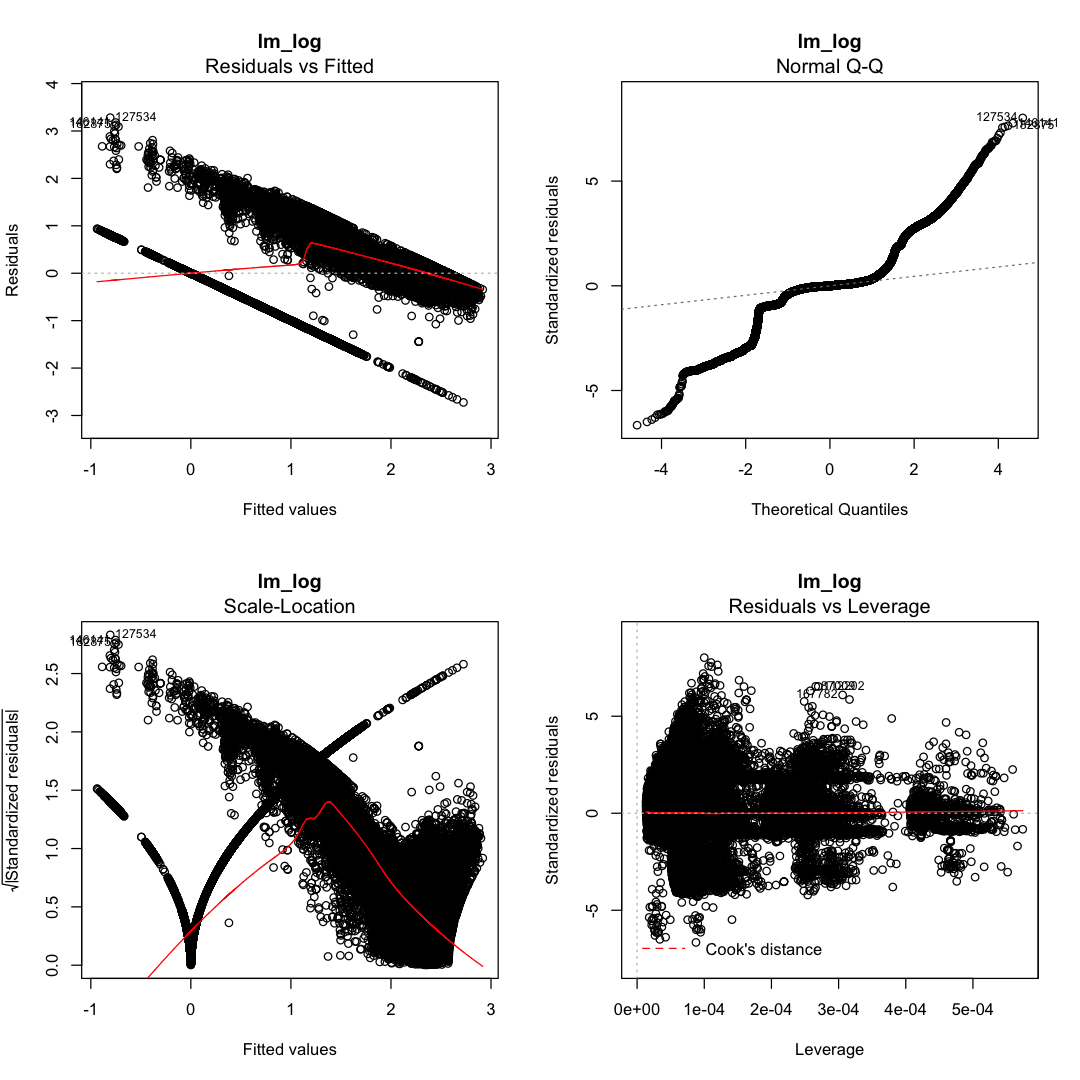

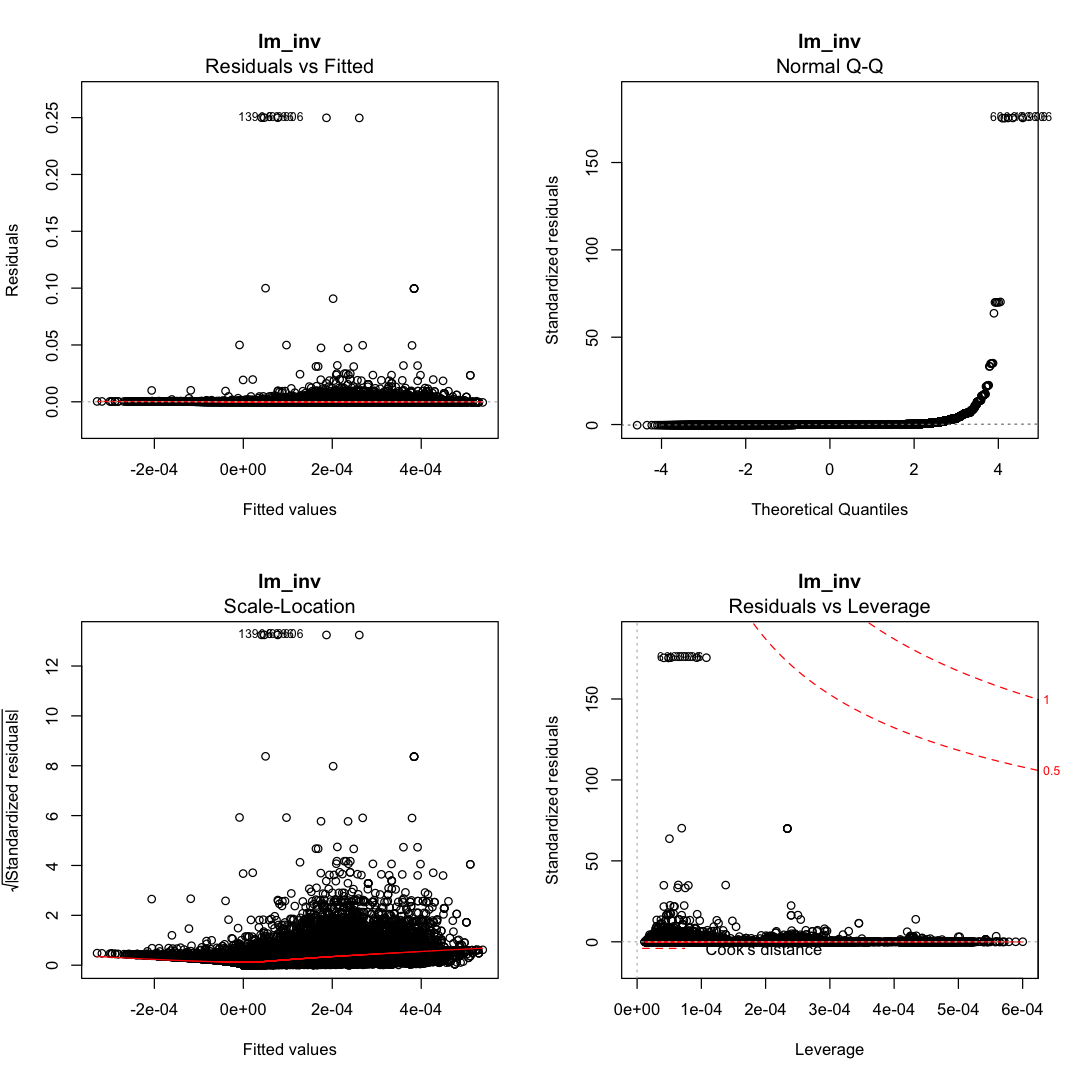

In [20]:
# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$RACE = mn$RACE
testincome$CLASSWKR = mn$CLASSWKR
testincome$DIFFSENS = mn$DIFFSENS
testincome$SEX = mn$SEX

testincome$inc1 = sqrt(mn$INCWAGE)
testincome$sqrt_fam = sqrt(mn$FAMSIZE)
testincome$sqrt_age = sqrt(mn$AGE)
testincome$sqrt_mar = sqrt(mn$MARRNO)
testincome$sqrt_hrs = sqrt(mn$UHRSWORK)
testincome$sqrt_occ = sqrt(mn$OCCSCORE)

testincome$inc2 = mn$INCWAGE
testincome$log_fam = mn$FAMSIZE
testincome$log_age = mn$AGE
testincome$log_mar = mn$MARRNO
testincome$log_hrs = mn$UHRSWORK
testincome$log_occ = mn$OCCSCORE

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = mn$INCWAGE
testincome$inv_fam = mn$FAMSIZE
testincome$inv_age = mn$AGE
testincome$inv_mar = mn$MARRNO
testincome$inv_hrs = mn$UHRSWORK
testincome$inv_occ = mn$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)
head(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + RACE + CLASSWKR +
             DIFFSENS + SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "lm_sqrt")

par(mfrow = c(2,2))
plot(lm_log, main = "lm_log")

par(mfrow = c(2,2))
plot(lm_inv, main = "lm_inv")

# Checking for Collinearity

In [37]:
# Since the transformations failed, 
# we are going to continue with our original model without transformations

v = vif(lm_3)
k = kappa(lm_3)
correlation = cor(model.matrix(lm_3)[,-1])

#femlab has the highest VIF with approximately 48.65
v; k; correlation

,GVIF,Df,GVIF^(1/(2*Df))
SEX,1.080961,1,1.039693
AGE,1.877964,1,1.370388
MARRNO,1.306469,1,1.143009
EDUC,1.115156,1,1.056010
CLASSWKR,3.560675,2,1.373672
UHRSWORK,2.041685,1,1.428875
OCCSCORE,2.849066,1,1.687918
DIFFSENS,1.106629,1,1.051964
RACE,1.049937,4,1.006110


[1] 1775.514

,SEXMale,AGE,MARRNO,EDUCHigh School or Less,CLASSWKRSelf-employed,CLASSWKRWorks for wages,UHRSWORK,OCCSCORE,DIFFSENSNo vision or hearing difficulty,RACEAsian American or Pacific Islander,RACEBlack/African American,RACEOther Race,RACEWhite
SEXMale,1.000000000,-0.03672824,-0.059084758,0.053602325,0.123137889,-0.003484196,0.174927503,0.144203411,-0.0580130706,-0.010260914,0.0146572489,0.004438377,-0.005983443
AGE,-0.036728239,1.00000000,0.448833756,0.140047723,0.040516336,-0.470785072,-0.421094935,-0.348976097,-0.2689296750,-0.099246695,-0.0807992343,-0.095023392,0.164711192
MARRNO,-0.059084758,0.44883376,1.000000000,-0.009269013,0.062142192,-0.138822334,-0.061212850,-0.024518222,-0.0759464939,-0.060279836,-0.0654621339,-0.056743234,0.116001854
EDUCHigh School or Less,0.053602325,0.14004772,-0.009269013,1.000000000,-0.004130447,-0.170480644,-0.193432496,-0.283487525,-0.0977781651,-0.007222394,0.0376901506,0.034004249,-0.050001330
CLASSWKRSelf-employed,0.123137889,0.04051634,0.062142192,-0.004130447,1.000000000,-0.492159465,0.162898050,0.146825345,0.0204286220,-0.030074418,-0.0311193313,-0.019918165,0.054110494
CLASSWKRWorks for wages,-0.003484196,-0.47078507,-0.138822334,-0.170480644,-0.492159465,1.000000000,0.493489594,0.593576999,0.1940896685,0.031664106,0.0232447435,0.032923312,-0.048636130
UHRSWORK,0.174927503,-0.42109493,-0.061212850,-0.193432496,0.162898050,0.493489594,1.000000000,0.619667646,0.2025362722,0.003881763,-0.0201232211,0.004858581,0.016063358
OCCSCORE,0.144203411,-0.34897610,-0.024518222,-0.283487525,0.146825345,0.593576999,0.619667646,1.000000000,0.1899525025,0.017687079,-0.0314196162,-0.005222865,0.023092504
DIFFSENSNo vision or hearing difficulty,-0.058013071,-0.26892968,-0.075946494,-0.097778165,0.020428622,0.194089668,0.202536272,0.189952502,1.0000000000,0.018420479,0.0001238364,0.013097345,-0.015957830
RACEAsian American or Pacific Islander,-0.010260914,-0.09924669,-0.060279836,-0.007222394,-0.030074418,0.031664106,0.003881763,0.017687079,0.0184204791,1.000000000,-0.0260356586,-0.023296227,-0.532892959


# MSE and MSPE

In [11]:
n = nrow(mn)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train = mn[sample_set, ]
test = mn[-sample_set, ]
head(train)

,FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS
88874,2,Male,33,0,Asian American or Pacific Islander,NA,High School or Less,Works for wages,45,475068,23,No vision or hearing difficulty
96744,1,Female,21,1,Other Race,NA,College or More,Works for wages,42,19882,27,No vision or hearing difficulty
26084,1,Male,59,1,White,NA,College or More,Works for wages,40,63704,32,No vision or hearing difficulty
21907,4,Female,29,1,White,15,High School or Less,N/A,0,0,0,No vision or hearing difficulty
121400,2,Female,53,1,White,NA,College or More,Works for wages,31,18835,33,No vision or hearing difficulty
69848,2,Male,57,1,White,NA,College or More,Works for wages,55,151567,42,No vision or hearing difficulty


In [12]:
mlr_inc = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = train)

In [13]:
# MSPE
k = nrow(test) #number of rows

y = train$INCWAGE
y_star = test$INCWAGE

X = cbind(1, train$AGE, train$FAMSIZE, train$MARRNO, train$UHRSWORK, train$OCCSCORE) #train model
X_star = cbind(1, test$AGE, test$FAMSIZE, test$MARRNO, test$UHRSWORK, test$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta #i'th response value in test set

MSPE = (1/k)*sum((y_star - y_hat_star)^2)

MSPE

[1] 1902122910

In [14]:
# MSE
n = nrow(train) # number of rows
y = train$INCWAGE
X = cbind(1, train$AGE, train$FAMSIZE, train$MARRNO, train$UHRSWORK, train$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE = (1/n)*sum((y - y_hat)^2); 

MSE

[1] 1838058681

In [15]:
MSE - MSPE

[1] -64064228

# Logistic Regression

In [16]:
mn$EDUC = as_factor(mn$EDUC)
mn$CLASSWKR = as_factor(mn$CLASSWKR)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

In [17]:
mn$INCTHRES = NA
mn$INCTHRES[mn$INCWAGE < 35000] =  0
mn$INCTHRES[mn$INCWAGE > 35000] =  1
head(mn)

FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS,INCTHRES
3,Male,37,1,White,NA,College or More,Works for wages,40,39815,42,No vision or hearing difficulty,1
3,Female,37,1,White,NA,College or More,Works for wages,50,106173,42,No vision or hearing difficulty,1
2,Female,25,0,White,NA,College or More,Works for wages,36,16988,16,No vision or hearing difficulty,0
5,Female,43,1,White,NA,College or More,Works for wages,32,45654,25,No vision or hearing difficulty,1
5,Male,42,1,White,NA,College or More,Works for wages,50,63704,30,No vision or hearing difficulty,1
5,Female,18,0,White,NA,High School or Less,N/A,0,0,0,No vision or hearing difficulty,0


In [18]:
glm_mn = glm(INCTHRES ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn, 
             family = binomial)
summary(glm_mn)


Call:
glm(formula = INCTHRES ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, family = binomial, 
    data = mn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0620  -0.4689  -0.0001   0.5819   3.6547  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.003e+01  2.941e+01  -0.681    0.496
SEXMale                                  3.909e-01  1.352e-02  28.913  < 2e-16
AGE                                      1.210e-02  5.302e-04  22.816  < 2e-16
MARRNO                                   4.330e-01  1.132e-02  38.263  < 2e-16
EDUCHigh School or Less                 -8.865e-01  1.391e-02 -63.730  < 2e-16
CLASSWKRSelf-employed                    1.077e+01  2.941e+01   0.366    0.714
CLASSWKRWorks for wages                  1.341e+01  2.941e+01   0.456    0.648
UHRSWORK                                 9.911e-02  6.278e-04 157.877  < 2e-16
OCCSCORE  

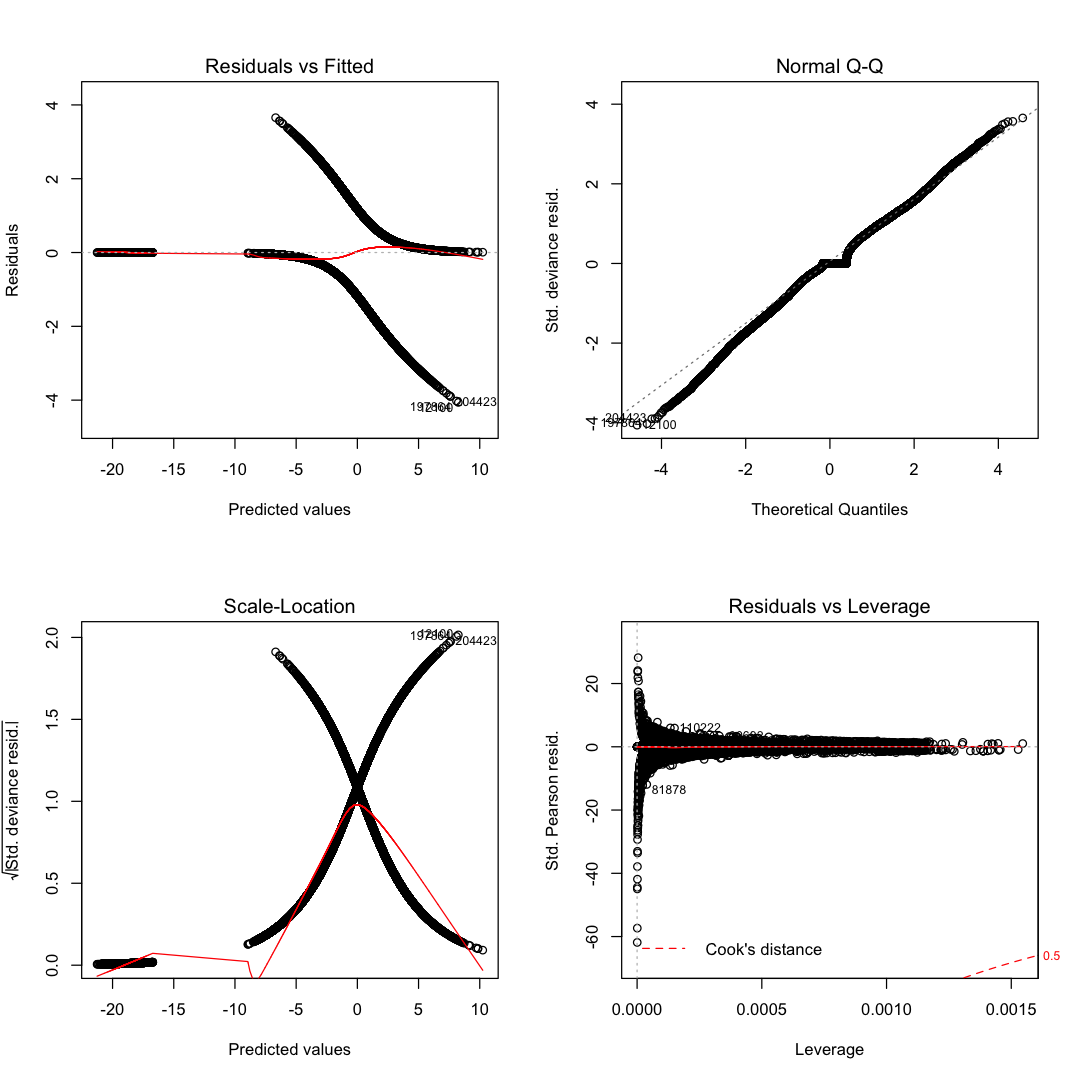

In [19]:
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(glm_mn)